# Uczenie nienadzorowane

Do tej pory zajmowaliśmy się uczeniem nadzorowanym (ang. *supervised*), tj. takimi przypadkami, gdy zbiór trenujący składał się z dwóch zmiennych `X` i `y`, a naszym zadaniem było przewidzenia `y` na podstawie danych z `X`. Ponadto poznaliśmy odpowiednie metryki, które pozwalały nam zmierzyć jak dobrze (lub) źle działają modele, które wytrenowaliśmy.

Przypomnijmy, że na uczenie maszynowe składają się trzy paradygmaty:
 * supervised learning
 * unsupervised learning
 * reinforcement learning
 
Dzisiejsze zajęcia są poświęcone drugiemu paradygmatowi, czyli uczeniu nienadzorowanym, a dokładniej automatycznemu klastrowaniu. Do klastrowania służą m.in. następujące algorytmy:
 * K-średnich (ang. *k-means*)
 * [DB-SCAN](https://en.wikipedia.org/wiki/DBSCAN)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Zadanie 0**: wczytaj do zmiennej `points` zbiór danych z pliku `points.csv`. Uwaga: kolumny są rozdzielone spacją. Plik nie zawiera nagłówka.

In [2]:
points  = pd.read_csv('points.csv', sep=' ', header=None)

Narysujmy wykres z wyżej wczytanych punktów.

<AxesSubplot:xlabel='0', ylabel='1'>

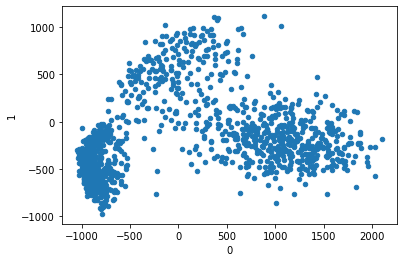

In [3]:
xs = points[0]
ys = points[1]

points.plot(kind='scatter', x=0, y=1)


**zadanie 1** Ile dostrzegasz rozdzielnych grup punktów na powyższym wykresie?

In [ ]:
3

Podstawowym algorytmem do klastrowania danych jest $k$-średnich albo k-means, który został omówiony na wykładzie.  Oczywiście biblioteka `sklearn` zawiera implementację tego algorytmu.

**zadanie 2** Wczytaj z biblioteki `sklearn.cluster` klasę `KMeans`.

In [2]:
from sklearn.cluster import KMeans

Algorytm k-means  wymaga podania oczekiwanej liczby klas, dlatego podczas tworzenia obiektu `KMeans` musimy podać parametr `n_clusters`. W poniższym przykładzie ustawiamy powyższy parametr na 3.

In [6]:
kmeans = KMeans(n_clusters=3)

**zadanie 3** Wywołaj metodę `fit` na obiekcie `kmeans` i jako parametr przekaż zmienną `points`. W taki sposób wytrenujesz model.

In [7]:
kmeans.fit(points)

KMeans(n_clusters=3)

**zadanie 4** Mając wytrenowany model k-średnich, możemy wyznaczyć klaster, do którego został przydzielony każdy z punktów. Służy do tego komenda *predict*. Wywołaj tę komendę na zmiennej *points* i zapisz wynik do zmiennej *clusters*.

In [8]:
clusters = kmeans.predict(points)

Wyświetlmy, w jaki sposób model podzielił punkty:

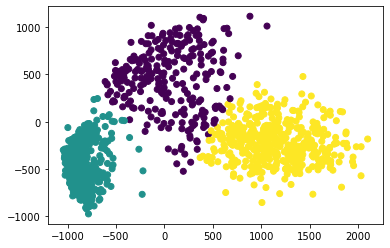

In [9]:
plt.scatter(x=points[0], y=points[1], c=clusters)
plt.show()

Informacje o centroidach są przechowywwane w atrybucie `cluster_centers_`:

In [10]:
for idx, centroid in enumerate(kmeans.cluster_centers_):
    print("Claster ID: {}\tX: {}\tY:{}".format(idx, centroid[0], centroid[1]))

Claster ID: 0	X: 58.93213533480312	Y:447.0059355970675
Claster ID: 1	X: -844.3076877296984	Y:-450.07153180895216
Claster ID: 2	X: 1157.3849081349179	Y:-212.01606095715306


**zadanie 5** Sprawdź, w jaki sposób podzieli zbiór punktów model k-średnich, jeżeli ustawimy liczbę klastrów na 2 i 4.

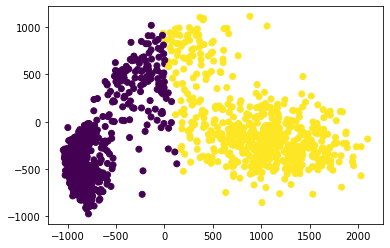

In [11]:
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(points)
clusters2 = kmeans2.predict(points)
plt.scatter(x=points[0], y=points[1], c=clusters2)
plt.show()

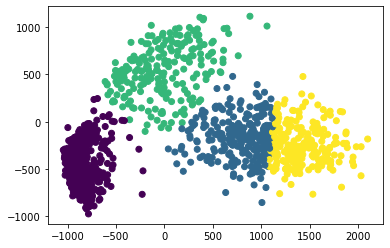

In [12]:
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(points)
clusters4 = kmeans4.predict(points)
plt.scatter(x=points[0], y=points[1], c=clusters4)
plt.show()

Algorytm k-średnich minimalizuje sumę odległości do najbliżsego centroidu, co możemy traktować jako funkcje kosztu i wykorzystać to porównania pomiędzy modelami z różnymi liczbami klastrów.

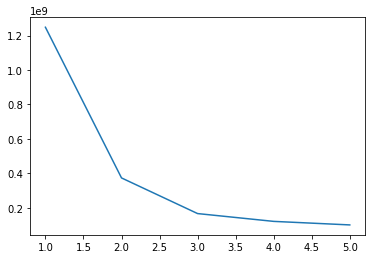

In [13]:
n_clusters = [1, 2, 3, 4, 5]
inertias = []

for n_cluster in n_clusters:
    model = KMeans(n_clusters=n_cluster)
    model.fit(points)
    inertias.append(model.inertia_)

plt.plot(n_clusters, inertias)
plt.show()

Powyższy wykres przedstawia zależność pomiędzy liczbą klastrów, a funkcją kosztu. Można łatwo zauważyć, powyżej 3 klastrów zależność na wygładza się. Stąd, liczba 3 wydaje się być najlepszym wyborem.

Drugim popularnym algorytmem jest DB-SCAN, który nie wymaga `a priori` podania liczby klastrów, którą sam ją wyznacza. Ponadto, cechą tego modelu jest możliwość pominięcia niektórych punktów, które są oddalone od skupisk.

In [3]:
from sklearn.cluster import DBSCAN

Model DB-SCAN przyjmuje dwa parametry: eps - odległość pomiędzy punktami i minimalną liczbę punktów potrzebna do utworzenia klastra.

In [15]:
db = DBSCAN(eps=130, min_samples=10)
labels = db.fit_predict(points)
labels

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

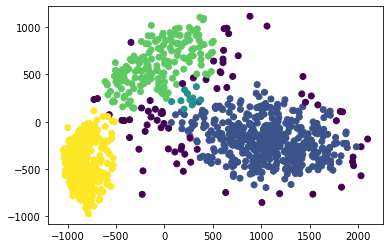

In [16]:
plt.scatter(x=points[0], y=points[1], c=labels)
plt.show()

**zadanie 6** Przeskaluj dane, tak aby miały rozkład standardowy (średnia = 0 , std = 1). I uruchom model SB-SCAN i k-średnich. Czy normalizacja zmieniła coś?

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(points)
train_scaled = scaler.fit_transform(points)
data = pd.DataFrame(train_scaled)


kmeans_new = KMeans(n_clusters=3)
kmeans_new.fit(data)
clusters_1 = kmeans_new.predict(data)
plt.scatter(x=data[0], y=data[1], c=clusters_1)
plt.show()




NameError: name 'points' is not defined

In [5]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

#W przypadku DB-scan po normalizacji nalżey wyznaczyc nowe eps i min_samples

#eps szczujemy na podstawie poniższego wykresu  ~0.15
#min_samples = 2* dim = 4

NameError: name 'data' is not defined

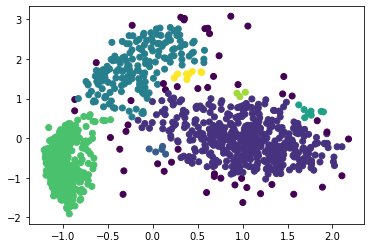

In [98]:
scaler = StandardScaler()
scaler.fit(points)
train_scaled = scaler.fit_transform(points)
data = pd.DataFrame(train_scaled)


db = DBSCAN(eps=0.15, min_samples=4)
labels = db.fit_predict(data)
labels

plt.scatter(x=data[0], y=data[1], c=labels)
plt.show()


#widzimy 3 główne klasy + 4 dodatkowe

In [64]:
print('Mean:', scaler.mean_)
print('Scale:', scaler.scale_)


Mean: [  75.23777275 -175.54258135]
Scale: [929.491056   419.64076406]


### Redukcja wymiaru

Jedną z wad algorytmu k-średnich jest czas trenowania, który rośnie z wymiarem danych, jak ich z liczbą przykładów trenujących. Podstawową techniką w takim przypadku jest zmniejszenie wymiarowości danych. Najprostszą techniką jest [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis).

In [6]:
from sklearn.decomposition import PCA

Ściągnijmy zbiór dancych MNIST, który pojawił się na naszych zajęciach.

In [7]:
"""
mnist = fetch_mldata('MNIST original')
X = mnist.data.astype('float64')
y = mnist.target
"""

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

X = mnist.data.astype('float64')
y = mnist.target

X



,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Podczas tworzeania PCA, możemy podać wyjsciową liczbę wymiarów (argument *n_components*). 

In [8]:
pca = PCA(n_components=10)
pca.fit(X)

PCA(n_components=10)

In [9]:
mnist_pca = pca.transform(X)

**zadanie 7** Wytrenuj K-Means na wyjściu z PCA. Ustaw liczbę klastrów na 10. Ponadto zapisz do `mnist_clasters` numer klastra, do którego został on przydzielony.

In [10]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(mnist_pca)
mnist_clasters = kmeans.predict(mnist_pca)
mnist_clasters

array([1, 8, 3, ..., 0, 9, 6])

**zadanie 8** Zmienna `y` zawiera informację o prawidłowych oznaczeniach: tj. liczby od 0 do 9 (włącznie). Dla każdej cyfry *i* znajdz klaster *j*, w którym znajduje się najwięcej cyfr *i*.

In [11]:
mnist_clasters_str = np.array([str(i) for i in mnist_clasters])
mnist_clasters_str

df = pd.DataFrame({'Prediction': mnist_clasters_str, 'Real value': y})
confusion_matrix = pd.pivot_table(df, index='Prediction', columns='Real value', aggfunc=len)

confusion_matrix.idxmax()

confusion_matrix

Real value,0,1,2,3,4,5,6,7,8,9
Prediction,,,,,,,,,,
0,11.0,7.0,74.0,44.0,2050.0,308.0,2.0,4182.0,269.0,2646.0
1,128.0,11.0,176.0,1149.0,15.0,1470.0,67.0,11.0,3736.0,93.0
2,3588.0,NaN,31.0,14.0,16.0,88.0,89.0,19.0,46.0,53.0
3,45.0,4.0,204.0,200.0,3738.0,460.0,108.0,2093.0,216.0,3376.0
4,20.0,8.0,4751.0,239.0,37.0,15.0,224.0,54.0,94.0,19.0
5,221.0,6.0,409.0,4516.0,NaN,1903.0,37.0,4.0,1178.0,85.0
6,193.0,6.0,255.0,37.0,276.0,84.0,5318.0,4.0,68.0,15.0
7,28.0,4273.0,620.0,644.0,307.0,497.0,624.0,616.0,525.0,496.0
8,2647.0,NaN,155.0,180.0,16.0,586.0,199.0,15.0,69.0,27.0


In [12]:
confusion_matrix.idxmax()

Real value
0    2
1    7
2    4
3    5
4    3
5    5
6    6
7    0
8    1
9    3
dtype: object

**zadanie 9** mając wyznaczone klasy z poprzedniego zadania, sumuj liczbę elementów w najpopularniejszym klastrze.

In [13]:
confusion_matrix.sum(axis=0)

Real value
0    6903.0
1    7877.0
2    6990.0
3    7141.0
4    6824.0
5    6313.0
6    6876.0
7    7293.0
8    6825.0
9    6958.0
dtype: float64

**zadanie 10** Oblicz accuracy biorąc wynik z poprzedniego zadania.

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y, mnist_clasters_str )


0.1192

**zadanie 11** Spróbuj podwyższych wynik, stosując np. normalizację lub zmieniając parametry.

In [27]:
scaler = StandardScaler()
scaler.fit(X)
train_scaled_2 = scaler.fit_transform(X)
data = pd.DataFrame(train_scaled_2)


pca = PCA(n_components=10)
pca.fit(data)
mnist_pca = pca.transform(data)

kmeans= KMeans(n_clusters=10)
kmeans.fit(mnist_pca)
mnist_clasters_2= kmeans.predict(mnist_pca)
mnist_clasters_2

mnist_clasters_2_str = np.array([str(i) for i in mnist_clasters_2])
mnist_clasters_2_str

accuracy_score(y, mnist_clasters_2_str)



0.17194285714285715

**Gratuluję!**